In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("C:/Users/admin/Downloads/bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data['age']=pd.to_numeric(data['age'],errors='coerce')
data['marital']=data['marital'].astype('category')
data['default']=data['default'].astype('category')
data['balance']=pd.to_numeric(data['balance'],errors='coerce')
data['housing']=data['housing'].astype('category')
data['loan']=data['loan'].astype('category')
data['contact']=data['contact'].astype('category')
data['day']=pd.to_numeric(data['day'],errors='coerce')
data['month']=data['month'].astype('category')
data['duration']=pd.to_numeric(data['duration'],errors='coerce')
data['campaign']=pd.to_numeric(data['campaign'],errors='coerce')
data['pdays']=pd.to_numeric(data['pdays'],errors='coerce')
data['day']=pd.to_numeric(data['day'],errors='coerce')
data['poutcome']=data['poutcome'].astype('category')
data['y']=data['y'].astype('category')

In [7]:
data['job']=data['job'].astype('category')
data['education']=data['education'].astype('category')

In [8]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df1 = data.drop(['default','contact','month','day','education','marital','job','pdays','poutcome'],axis = 1)
df = df1.rename({'y': 'Clients_Subscribed'}, axis=1)
df = df.replace(['yes'], 1)
df = df.replace(['no'], 0)
df.head()

,age,balance,housing,loan,duration,campaign,previous,Clients_Subscribed
0,58,2143,1,0,261,1,0,0
1,44,29,1,0,151,1,0,0
2,33,2,1,1,76,1,0,0
3,47,1506,1,0,92,1,0,0
4,33,1,0,0,198,1,0,0


In [10]:

df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 45211 non-null  int64   
 1   balance             45211 non-null  int64   
 2   housing             45211 non-null  category
 3   loan                45211 non-null  category
 4   duration            45211 non-null  int64   
 5   campaign            45211 non-null  int64   
 6   previous            45211 non-null  int64   
 7   Clients_Subscribed  45211 non-null  category
dtypes: category(3), int64(5)
memory usage: 1.9 MB


In [11]:
X = df.iloc[:,:7] 
Y = df.iloc[:,7]

In [12]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [13]:
y_pred = classifier.predict(X)

In [14]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [15]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print (cm)

[[39114   808]
 [ 4263  1026]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [18]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
sensitivity=TP/(TP+FN)
spec=TN/(TN+FP)
precision=TP/(TP+FP)
print(sensitivity,spec,precision)

0.19398752127056154 0.9797605330394269 0.559432933478735


In [19]:
import numpy as np
Accuracy= np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.8878370308110858


In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})

Text(0, 0.5, 'True Positive Rate')

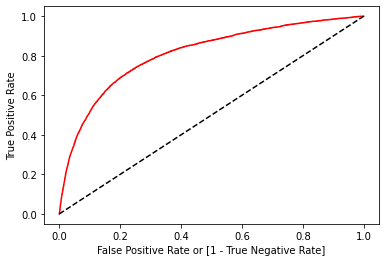

In [21]:
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [22]:
auc

0.5868740271549941

In [23]:
df_new[df_new["fpr"]>=0.2]

,fpr,tpr,cutoff
4597,0.200416,0.688221,1.423980e-01
4598,0.200416,0.688599,1.423681e-01
4599,0.200491,0.688599,1.423057e-01
4600,0.200491,0.688788,1.422968e-01
4601,0.200516,0.688788,1.422771e-01
...,...,...,...
7731,0.996142,0.999622,1.369353e-07
7732,0.996142,0.999811,1.315667e-07
7733,0.998171,0.999811,5.874567e-09
7734,0.998171,1.000000,5.340524e-09


In [24]:
prob=classifier.predict_proba(X)
prob=prob[:,1]

new_pred= pd.DataFrame({'actual': Y,"pred":0})
new_pred.loc[prob>0.14,"pred"]=1
new_pred

,actual,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [25]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new
print(classification_report(new_pred.actual,new_pred.pred))


              precision    recall  f1-score   support

           0       0.95      0.79      0.87     39922
           1       0.31      0.69      0.43      5289

    accuracy                           0.78     45211
   macro avg       0.63      0.74      0.65     45211
weighted avg       0.88      0.78      0.81     45211

